In [3]:
import torchvision.datasets as datasets
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

import gc
gc.collect()
torch.cuda.empty_cache()

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
num_epochs = 30
batch_size = 30
learning_rate = 0.001

transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
)

cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

cor_class_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_loader = torch.utils.data.DataLoader(cifar_trainset
    , batch_size = batch_size
    , shuffle = True)
test_loader = torch.utils.data.DataLoader(cifar_testset
    , batch_size = batch_size
    , shuffle = True)

train_total_step = len(train_loader)
test_total_step = len(test_loader)
print(train_total_step, test_total_step)

cuda


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
1667 334


In [5]:
from tqdm import tqdm

In [6]:
model = torchvision.models.vgg19(pretrained = False)
input_lastLayer = model.classifier[6].in_features # last layer input num
model.classifier[6] = nn.Linear(input_lastLayer,10) # change last layer output
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), 
                        lr = learning_rate, 
                        momentum=0.9,
                        weight_decay=5e-4)
H = {
	"train_loss": [],
	"train_acc": [],
	"test_loss": [],
	"test_acc": []
}

for epoch in range(num_epochs):
    # set the model in training mode
    model.train()
    total_train_loss = 0
    total_test_loss = 0
    train_correct = 0
    test_correct = 0
    # loop over the training set
    progress = tqdm(total=len(train_loader))
    for (x, y) in train_loader:
        progress.update(1)
		# send the input to the device
        (x, y) = (x.to(device), y.to(device))
		# perform a forward pass and calculate the training loss
        pred = model(x)
        loss = criterion(pred, y)
		# zero out the gradients, perform the backpropagation step,
		# and update the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # add the loss to the total training loss so far and
        # calculate the number of correct predictions
        total_train_loss += loss
        train_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  
    # switch off autograd for evaluation
    with torch.no_grad():
        # set the model in evaluation mode
        model.eval()
        # loop over the validation set
        for (x, y) in test_loader:
            # send the input to the device
            (x, y) = (x.to(device), y.to(device))
            # make the predictions and calculate the validation loss
            pred = model(x)
            total_test_loss += criterion(pred, y)
            # calculate the number of correct predictions
            test_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # calculate the average training and validation loss
    avg_train_loss = total_train_loss / train_total_step
    avg_test_loss = total_test_loss / test_total_step

    # calculate the training and validation accuracy
    train_correct = train_correct / len(train_loader.dataset)
    test_correct = test_correct / len(test_loader.dataset)

    # update our training history
    H["train_loss"].append(avg_train_loss.cpu().detach().numpy())
    H["train_acc"].append(train_correct)
    H["test_loss"].append(avg_test_loss.cpu().detach().numpy())
    H["test_acc"].append(test_correct)

    # print the model training and validation information
    print("[INFO] EPOCH: {}/{}".format(epoch + 1, num_epochs))
    print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(avg_train_loss, train_correct))
    print("Test loss: {:.6f}, Test accuracy: {:.4f}\n".format(avg_test_loss, test_correct))

100%|██████████| 1667/1667 [16:24<00:00,  1.71it/s]

[INFO] EPOCH: 1/30
Train loss: 1.812647, Train accuracy: 0.3314
Test loss: 1.466321, Test accuracy: 0.4625




100%|██████████| 1667/1667 [17:39<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:25<00:00,  1.70it/s]

[INFO] EPOCH: 2/30
Train loss: 1.379051, Train accuracy: 0.4977
Test loss: 1.224690, Test accuracy: 0.5622



100%|██████████| 1667/1667 [16:24<00:00,  1.71it/s]

[INFO] EPOCH: 3/30
Train loss: 1.122036, Train accuracy: 0.5985
Test loss: 0.966717, Test accuracy: 0.6608




100%|██████████| 1667/1667 [17:40<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:26<00:00,  1.67it/s]

[INFO] EPOCH: 4/30
Train loss: 0.916254, Train accuracy: 0.6742
Test loss: 0.858965, Test accuracy: 0.7061



100%|██████████| 1667/1667 [16:24<00:00,  1.70it/s]

[INFO] EPOCH: 5/30
Train loss: 0.769785, Train accuracy: 0.7310
Test loss: 0.762764, Test accuracy: 0.7354




100%|██████████| 1667/1667 [17:40<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:25<00:00,  1.71it/s]

[INFO] EPOCH: 6/30
Train loss: 0.659766, Train accuracy: 0.7704
Test loss: 0.674425, Test accuracy: 0.7696



100%|██████████| 1667/1667 [16:24<00:00,  1.70it/s]

[INFO] EPOCH: 7/30
Train loss: 0.558268, Train accuracy: 0.8074
Test loss: 0.692908, Test accuracy: 0.7636




100%|██████████| 1667/1667 [17:40<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:26<00:00,  1.71it/s]

[INFO] EPOCH: 8/30
Train loss: 0.474351, Train accuracy: 0.8350
Test loss: 0.626102, Test accuracy: 0.7901



100%|██████████| 1667/1667 [16:24<00:00,  1.70it/s]

[INFO] EPOCH: 9/30
Train loss: 0.392767, Train accuracy: 0.8649
Test loss: 0.625355, Test accuracy: 0.7922




100%|██████████| 1667/1667 [17:40<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:26<00:00,  1.71it/s]

[INFO] EPOCH: 10/30
Train loss: 0.318573, Train accuracy: 0.8882
Test loss: 0.595039, Test accuracy: 0.8074



100%|██████████| 1667/1667 [16:24<00:00,  1.70it/s]

[INFO] EPOCH: 11/30
Train loss: 0.266306, Train accuracy: 0.9075
Test loss: 0.601376, Test accuracy: 0.8075




100%|██████████| 1667/1667 [17:40<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:26<00:00,  1.69it/s]

[INFO] EPOCH: 12/30
Train loss: 0.209001, Train accuracy: 0.9286
Test loss: 0.650599, Test accuracy: 0.8089



100%|██████████| 1667/1667 [16:25<00:00,  1.70it/s]

[INFO] EPOCH: 13/30
Train loss: 0.165968, Train accuracy: 0.9418
Test loss: 0.680283, Test accuracy: 0.8153




100%|██████████| 1667/1667 [17:41<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:27<00:00,  1.70it/s]

[INFO] EPOCH: 14/30
Train loss: 0.136614, Train accuracy: 0.9517
Test loss: 0.688951, Test accuracy: 0.8071



100%|██████████| 1667/1667 [16:25<00:00,  1.71it/s]

[INFO] EPOCH: 15/30
Train loss: 0.114141, Train accuracy: 0.9609
Test loss: 0.702120, Test accuracy: 0.8235




100%|██████████| 1667/1667 [17:41<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:27<00:00,  1.70it/s]

[INFO] EPOCH: 16/30
Train loss: 0.098466, Train accuracy: 0.9668
Test loss: 0.715938, Test accuracy: 0.8140



100%|██████████| 1667/1667 [16:25<00:00,  1.71it/s]

[INFO] EPOCH: 17/30
Train loss: 0.088355, Train accuracy: 0.9702
Test loss: 0.813431, Test accuracy: 0.8163




100%|██████████| 1667/1667 [17:41<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:27<00:00,  1.71it/s]

[INFO] EPOCH: 18/30
Train loss: 0.073306, Train accuracy: 0.9758
Test loss: 0.780387, Test accuracy: 0.8159



100%|██████████| 1667/1667 [16:25<00:00,  1.71it/s]

[INFO] EPOCH: 19/30
Train loss: 0.066632, Train accuracy: 0.9775
Test loss: 0.812611, Test accuracy: 0.8107




100%|██████████| 1667/1667 [17:41<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:28<00:00,  1.70it/s]

[INFO] EPOCH: 20/30
Train loss: 0.052157, Train accuracy: 0.9830
Test loss: 0.785533, Test accuracy: 0.8223



100%|██████████| 1667/1667 [16:25<00:00,  1.69it/s]

[INFO] EPOCH: 21/30
Train loss: 0.049603, Train accuracy: 0.9833
Test loss: 0.921959, Test accuracy: 0.8181




100%|██████████| 1667/1667 [17:41<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:29<00:00,  1.68it/s]

[INFO] EPOCH: 22/30
Train loss: 0.044238, Train accuracy: 0.9856
Test loss: 0.882278, Test accuracy: 0.8250



100%|██████████| 1667/1667 [16:25<00:00,  1.71it/s]

[INFO] EPOCH: 23/30
Train loss: 0.041895, Train accuracy: 0.9861
Test loss: 0.877665, Test accuracy: 0.8234




100%|██████████| 1667/1667 [17:42<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:28<00:00,  1.71it/s]

[INFO] EPOCH: 24/30
Train loss: 0.038305, Train accuracy: 0.9879
Test loss: 0.941738, Test accuracy: 0.8103



100%|██████████| 1667/1667 [16:25<00:00,  1.70it/s]

[INFO] EPOCH: 25/30
Train loss: 0.035444, Train accuracy: 0.9878
Test loss: 0.902712, Test accuracy: 0.8227




100%|██████████| 1667/1667 [17:41<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:28<00:00,  1.71it/s]

[INFO] EPOCH: 26/30
Train loss: 0.033577, Train accuracy: 0.9892
Test loss: 0.897119, Test accuracy: 0.8236



100%|██████████| 1667/1667 [16:25<00:00,  1.71it/s]

[INFO] EPOCH: 27/30
Train loss: 0.030986, Train accuracy: 0.9903
Test loss: 0.938234, Test accuracy: 0.8204




100%|██████████| 1667/1667 [17:41<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:28<00:00,  1.71it/s]

[INFO] EPOCH: 28/30
Train loss: 0.029312, Train accuracy: 0.9903
Test loss: 0.820190, Test accuracy: 0.8213



100%|██████████| 1667/1667 [16:25<00:00,  1.71it/s]

[INFO] EPOCH: 29/30
Train loss: 0.028473, Train accuracy: 0.9905
Test loss: 0.855326, Test accuracy: 0.8241




100%|██████████| 1667/1667 [17:41<00:00,  1.57it/s]

100%|██████████| 1667/1667 [16:28<00:00,  1.71it/s]

[INFO] EPOCH: 30/30
Train loss: 0.026047, Train accuracy: 0.9916
Test loss: 0.915718, Test accuracy: 0.8291



In [7]:
print(H["train_loss"])
print(H["train_acc"])
print(H["test_loss"])
print(H["test_acc"])

[array(1.8126472, dtype=float32), array(1.3790511, dtype=float32), array(1.1220355, dtype=float32), array(0.9162544, dtype=float32), array(0.7697854, dtype=float32), array(0.65976554, dtype=float32), array(0.5582682, dtype=float32), array(0.47435105, dtype=float32), array(0.39276683, dtype=float32), array(0.31857282, dtype=float32), array(0.26630646, dtype=float32), array(0.20900069, dtype=float32), array(0.16596824, dtype=float32), array(0.1366139, dtype=float32), array(0.11414093, dtype=float32), array(0.09846577, dtype=float32), array(0.08835478, dtype=float32), array(0.07330563, dtype=float32), array(0.06663235, dtype=float32), array(0.05215672, dtype=float32), array(0.04960283, dtype=float32), array(0.04423758, dtype=float32), array(0.0418954, dtype=float32), array(0.03830474, dtype=float32), array(0.03544427, dtype=float32), array(0.03357695, dtype=float32), array(0.03098553, dtype=float32), array(0.0293123, dtype=float32), array(0.02847271, dtype=float32), array(0.02604748, dtyp

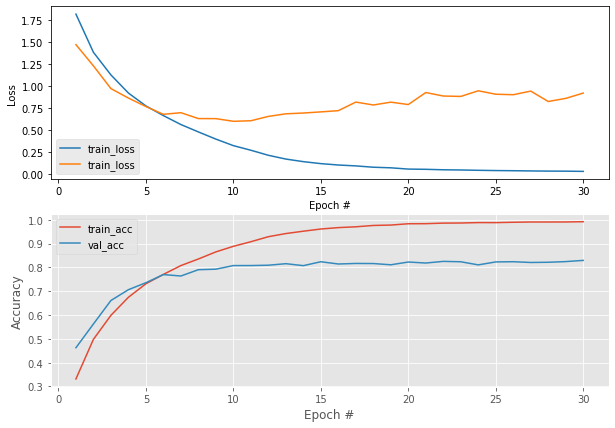

In [8]:
import matplotlib.pyplot as plt

# plot the training loss and accuracy
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2,2,(1,2))
plt.style.use("ggplot")

plt.plot(range(1, len(H["train_loss"]) + 1), H["train_loss"], label="train_loss")
plt.plot(range(1, len(H["test_loss"]) + 1), H["test_loss"], label="test_loss")

plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

fig.add_subplot(2,2,(3,4))
plt.plot(range(1, len(H["train_acc"]) + 1), H["train_acc"], label="train_acc")
plt.plot(range(1, len(H["test_acc"]) + 1), H["test_acc"], label="test_acc")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="best")

plt.savefig('la_epoch30.png')
plt.show()

In [9]:
# serialize the model to disk
torch.save(model, 'model_epoch_30.pt')

In [13]:
model = torch.load('./model_epoch_30.pt')
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
from PIL import Image
 

In [ ]:
img = Image.open('cat.jpg').convert('RGB').resize((224,224), Image.ANTIALIAS)
tfms = transforms.Compose([
        # transforms.Resize(224,224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
# unsqueeze provides the batch dimension
img_tensor = tfms(img).to('cuda').unsqueeze(0)

output = model(img_tensor)
# # to binarize the output since I had only 1 class
output = (output.squeeze().cpu().detach().numpy())
# print(output.argmax(axis=0))

cor_class_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(cor_class_list[output.argmax(axis=0)])

In [12]:
!zip -r file.zip "./model_epoch_30.pt"

  adding: model_epoch_30.pt (deflated 7%)
